In [5]:
import math

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation



%matplotlib inline

In [6]:
df = pd.read_csv('data_1D_noisy.csv')
clean_df = pd.read_csv('data_1D_clean.csv')

In [7]:
df.columns

Index(['time', 'location', 'moon_phase', 'mercury_theta', 'mercury_phi',
       'mercury_r', 'mercury_x', 'mercury_y', 'mercury_z', 'venus_theta',
       'venus_phi', 'venus_r', 'venus_x', 'venus_y', 'venus_z', 'mars_theta',
       'mars_phi', 'mars_r', 'mars_x', 'mars_y', 'mars_z', 'jupiter_theta',
       'jupiter_phi', 'jupiter_r', 'jupiter_x', 'jupiter_y', 'jupiter_z',
       'saturn_theta', 'saturn_phi', 'saturn_r', 'saturn_x', 'saturn_y',
       'saturn_z', 'moon_theta', 'moon_phi', 'moon_r', 'moon_x', 'moon_y',
       'moon_z', 'sun_theta', 'sun_phi', 'sun_r', 'sun_x', 'sun_y', 'sun_z'],
      dtype='object')

In [403]:
df.head()

,time,location,moon_phase,mercury_theta,mercury_phi,mercury_r,mercury_x,mercury_y,mercury_z,venus_theta,...,moon_r,moon_x,moon_y,moon_z,sun_theta,sun_phi,sun_r,sun_x,sun_y,sun_z
0,1850-01-01 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",0.594418,292.968057,-25.266739,1.391134,0.535583,-1.242793,-0.680117,266.284611,...,-0.211686,0.049001,-0.066262,-0.012603,283.070516,-24.114082,1.029957,0.121444,-0.970562,-0.216441
1,1850-01-02 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",0.830606,294.568750,-22.663839,1.504449,0.626845,-1.132094,-0.610270,268.352129,...,-0.050605,-0.119186,-0.102460,0.047126,284.599185,-23.335775,1.045210,0.216972,-0.799564,-0.396122
2,1850-01-03 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.059447,296.013360,-22.531249,1.272115,0.502986,-1.025599,-0.486452,270.382391,...,-0.062484,0.049808,0.072094,-0.125288,283.471697,-22.957440,1.020389,0.173138,-0.602758,-0.185922
3,1850-01-04 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.280279,295.994479,-21.938996,1.411388,0.747526,-1.086990,-0.494150,270.383643,...,0.032512,0.072811,0.093557,-0.115818,286.110066,-23.177698,1.044045,0.311791,-1.024249,-0.401204
4,1850-01-05 00:00:00,"(4461340.48313723, 919588.07009129, 4449530.22...",1.493380,299.027258,-22.109491,1.416807,0.563990,-1.201996,-0.422775,272.918802,...,-0.042872,0.122073,0.023982,0.076336,285.775850,-21.046700,0.929783,0.338162,-0.914978,-0.327011


# 1. Brief Fourier analysis of complex trajectories

### FFT of Mercury XY trajectory (complex)

Text(0.5, 1.0, 'Mercury spectral phase')

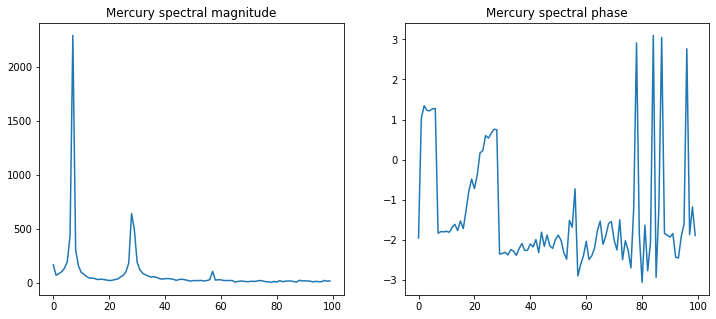

In [106]:
## Performing FFT on the polar coordinates (complex numbers) of Mercury's XY trajectory

mercury_polar = df['mercury_x'][0:2500] + 1j*df['mercury_y'][0:2500]

mercury_yft = np.fft.fft(mercury_polar)

# Plotting spectra and angle of Mercury FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(mercury_yft)[0:100])
ax1.set_title("Mercury spectral magnitude")
ax2.plot(range(0, 100), np.angle(mercury_yft)[0:100])
ax2.set_title("Mercury spectral phase")

### FFT of Venus XY trajectory (complex)

Text(0.5, 1.0, 'Venus spectral phase')

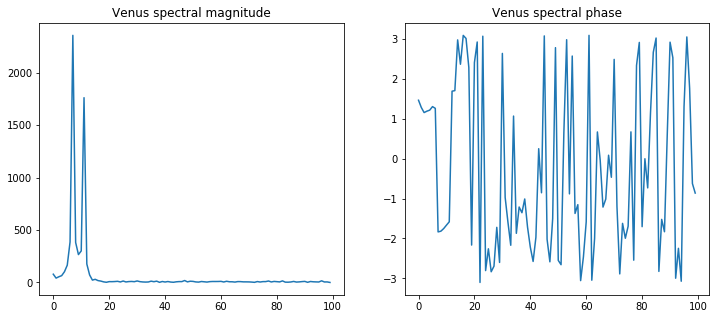

In [107]:
## Performing FFT on the polar coordinates (complex numbers) of Venus's XY trajectory

venus_polar = df['venus_x'][0:2500] + 1j*df['venus_y'][0:2500]

venus_yft = np.fft.fft(venus_polar)

# Plotting spectra and angle of Venus FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(venus_yft)[0:100])
ax1.set_title("Venus spectral magnitude")
ax2.plot(range(0, 100), np.angle(venus_yft)[0:100])
ax2.set_title("Venus spectral phase")

### FFT of Moon XY trajectory (complex)

Text(0.5, 1.0, 'Moon spectral phase')

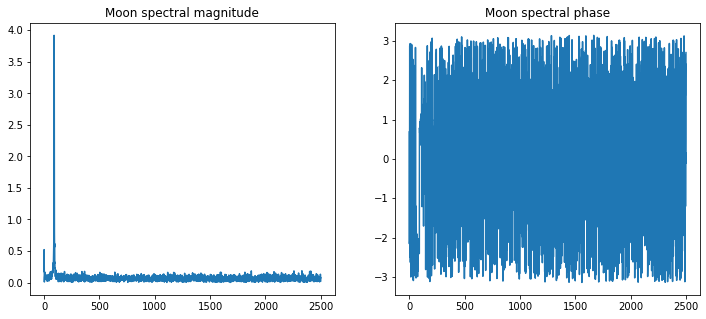

In [109]:
## Performing FFT on the polar coordinates (complex numbers) of the Moon's trajectory
# Original dataset too noisy, so reconstructing Moon data with less harsh noise model

moon_polar = clean_df['moon_x'][0:2500] + np.random.normal(0, 0.001, 2500) + 1j*clean_df['moon_y'][0:2500] + 1j*np.random.normal(0, 0.001, 2500)

moon_yft = np.fft.fft(moon_polar)

# Plotting spectra and angle of the Moon's FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, len(moon_yft)), np.abs(moon_yft))
ax1.set_title("Moon spectral magnitude")
ax2.plot(range(0, len(moon_yft)), np.angle(moon_yft))
ax2.set_title("Moon spectral phase")

### FFT of Mars XY trajectory (complex)

Text(0.5, 1.0, 'Mercury spectral phase')

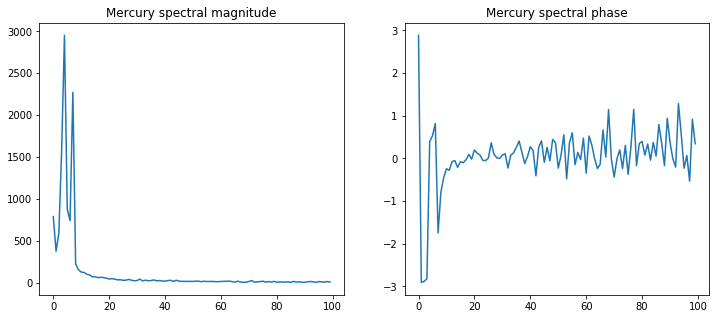

In [112]:
## Performing FFT on the polar coordinates (complex numbers) of Mars's XY trajectory

mars_polar = df['mars_x'][0:2500] + 1j*df['mars_y'][0:2500]

mars_yft = np.fft.fft(mars_polar)

# Plotting spectra and angle of Mars's FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(mars_yft)[0:100])
ax1.set_title("Mercury spectral magnitude")
ax2.plot(range(0, 100), np.angle(mars_yft)[0:100])
ax2.set_title("Mercury spectral phase")


### FFT of Jupiter XY trajectory (complex)

Text(0.5, 1.0, 'Jupiter spectral phase')

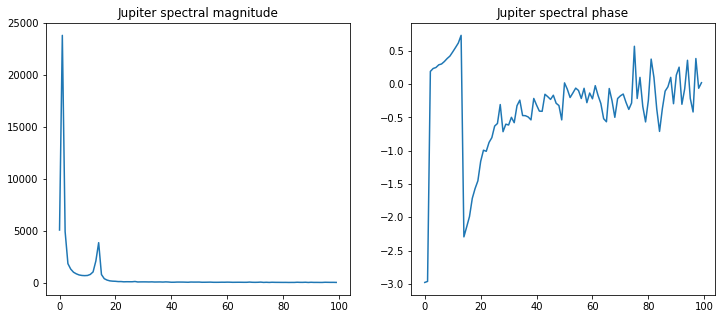

In [113]:
## Performing FFT on the polar coordinates (complex numbers) of Jupiter's XY trajectory

jupiter_polar = df['jupiter_x'][0:5000] + 1j*df['jupiter_y'][0:5000]

jupiter_yft = np.fft.fft(jupiter_polar)

# Plotting spectra and angle of Jupiter's FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(jupiter_yft)[0:100])
ax1.set_title("Jupiter spectral magnitude")
ax2.plot(range(0, 100), np.angle(jupiter_yft)[0:100])
ax2.set_title("Jupiter spectral phase")


### FFT of Saturn XY trajectory (complex)

Text(0.5, 1.0, 'Saturn spectral phase')

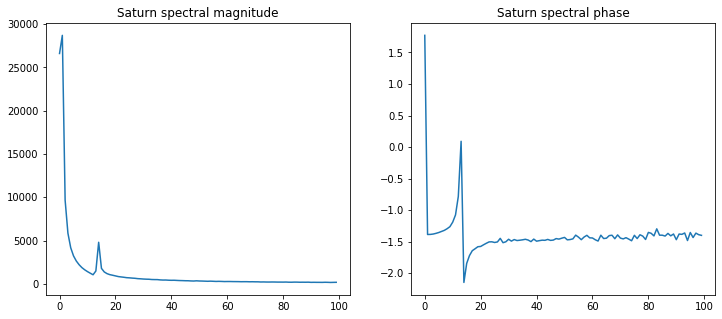

In [116]:
## Performing FFT on the polar coordinates (complex numbers) of Saturn's XY trajectory

saturn_polar = df['saturn_x'][0:5000] + 1j*df['saturn_y'][0:5000]

saturn_yft = np.fft.fft(saturn_polar)

# Plotting spectra and angle of Saturn's FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(saturn_yft)[0:100])
ax1.set_title("Saturn spectral magnitude")
ax2.plot(range(0, 100), np.angle(saturn_yft)[0:100])
ax2.set_title("Saturn spectral phase")


### FFT of Sun XY trajectory (complex)

Text(0.5, 1.0, 'Sun spectral phase')

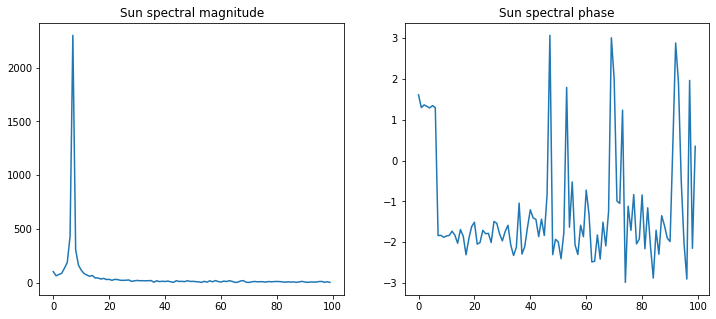

In [117]:
## Performing FFT on the polar coordinates (complex numbers) of the Sun's XY trajectory

sun_polar = df['sun_x'][0:2500] + 1j*df['sun_y'][0:2500]

sun_yft = np.fft.fft(sun_polar)

# Plotting spectra and angle of the Sun's FFT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(range(0, 100), np.abs(sun_yft)[0:100])
ax1.set_title("Sun spectral magnitude")
ax2.plot(range(0, 100), np.angle(sun_yft)[0:100])
ax2.set_title("Sun spectral phase")

# 2. Finding best FFT windows for each planet's XYZ approximations, then plotting different flavors of training error (test error w.r.t. ground truth is later in notebook)

### Defining "peak_finder" function to robustly (via weak heuristic) identify top two frequencies in spectral plots

In [39]:
def peak_finder(fft_magnitudes):
    # Finds top two peaks (magnitude) based on heuristic
    sort_indices = np.argsort(fft_magnitudes)[:0:-1]
    freq_1_ind = sort_indices[0]
    
    # IMPORTANT - changing threshold can change results significantly (see code below)
    threshold = 1/2
    
    # Finding second peak, ensuring that it is distinct from first
    for k in sort_indices[1:]:
        start = min(freq_1_ind, k)
        end = max(freq_1_ind, k)
        fft_slice = fft_magnitudes[start+1:end]
        
        # Ensuring that magnitudes approach zero between first and second peak
        if ((fft_slice < threshold*fft_magnitudes[freq_1_ind]).sum() > 0):
            freq_2_ind = k
            return (freq_1_ind, freq_2_ind)
    
    # Don't think this scenario will ever happen, but leaving it for debugging purposes
    print("Couldn't find valid second peak! Returning single peak")
    return (freq_1_ind)

### Function to loop through FFT window sizes to find top two frequencies for celestial body XY-approximation

In [42]:
def XY_fft_optimizer(body_name, celestial_complex, start, end, step, val_size):
    # Input "body_name" needs to be a string corresponding to celestial body stored in dataframe.
    # Input "celestial_complex" needs to be a vector of complex values (corresponding to celestial body's XY coordinates) of
    # length >= end + val_size.
    
    # Looping through different choices of FFT window length, noting MSE for the 2-frequency approximations from each choice.
    # MSE is computed using reconstruction of signal evaluated on fixed time points (size "val_size") OUTSIDE of FFT window,
    # with the **NOISY dataset. Ground truth data is reserved for test time.**
    # Then returning optimal FFT window length from validation procedure, as well as its indices corresponding to 
    # top 2 frequencies, and finally a tuple of errors storing values generated throughout optimization.


    celestial_errors = []
    for K in range(start, end, step):
        celestial_Yft = np.fft.fft(celestial_complex[0:K])

        frequencies = peak_finder(np.abs(celestial_Yft))
        freq_1_ind = frequencies[0]
        if (len(frequencies) == 2):
            freq_2_ind = frequencies[1]

        celestial_approx = 1/len(celestial_Yft) * np.exp(1j*np.angle(celestial_Yft)[freq_1_ind]) * (np.abs(celestial_Yft)[freq_1_ind] * 
                                                                         np.exp(2*math.pi*freq_1_ind/len(celestial_Yft)*1j*
                                                                               np.arange(K, K+val_size)))
        
        celestial_approx += 1/len(celestial_Yft) * (np.exp(1j*np.angle(celestial_Yft)[freq_2_ind]) * 
                                                (np.abs(celestial_Yft)[freq_2_ind] * 
                                                 np.exp(2*math.pi*freq_2_ind/len(celestial_Yft)*1j*np.arange(K, K+val_size))))

        celestial_xhat = np.real(celestial_approx)
        celestial_yhat = np.imag(celestial_approx)

        # Evaluating MSE by reconstructing signal from FFT, evaluating it on time window of size "val_size" OUTSIDE
        # of FFT window
        MSE = 1/val_size * (np.linalg.norm(celestial_xhat - df[body_name+"_x"][K:K+val_size])**2 + 
                     np.linalg.norm(celestial_yhat - df[body_name+"_y"][K:K+val_size])**2)
        celestial_errors.append((K, freq_1_ind, freq_2_ind, MSE))

    # Finding window length (and two frequencies for that length) corresponding to minimum MSE
    opt_index = np.argmin(np.array([j[3] for j in celestial_errors]))
    celestial_opt_length = start + step * opt_index
    # Below are indices (between 1 to K, where K is FFT window length) corresponding to particular frequencies
    celestial_opt_freq_1 = celestial_errors[opt_index][1]
    celestial_opt_freq_2 = celestial_errors[opt_index][2]
    
    return (celestial_opt_length, celestial_opt_freq_1, celestial_opt_freq_2, celestial_errors)


### Looping through FFT window sizes to find top two frequencies for Mercury (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

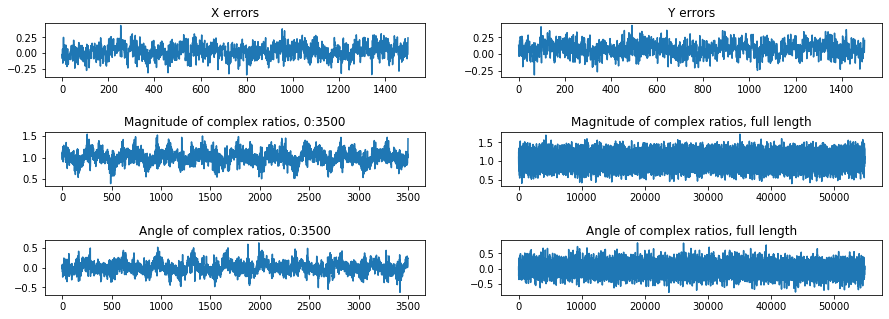

In [79]:
## Going to perform FFT on the *complex* coordinates encoding Mercury's Cartesian trajectory in the XY-plane
mercury_complex = df['mercury_x'] + 1j*df['mercury_y']


# Getting optimal Mercury values from XY FFT optimizer
(mercury_opt_length, mercury_opt_freq_1, mercury_opt_freq_2, mercury_errors) = XY_fft_optimizer(body_name="mercury", 
                                                                                                celestial_complex=mercury_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
mercury_yft_opt = np.fft.fft(mercury_complex[0:mercury_opt_length])

mercury_approx_full = 1/len(mercury_yft_opt) * np.exp(1j*np.angle(mercury_yft_opt)[mercury_opt_freq_1]) * (np.abs(mercury_yft_opt)[mercury_opt_freq_1] * 
                                                                 np.exp(2*math.pi*mercury_opt_freq_1/len(mercury_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
mercury_approx_full += 1/len(mercury_yft_opt) * np.exp(1j*np.angle(mercury_yft_opt)[mercury_opt_freq_2]) * (np.abs(mercury_yft_opt)[mercury_opt_freq_2] * 
                                                                 np.exp(2*math.pi*mercury_opt_freq_2/len(mercury_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
mercury_complex_ratios = mercury_complex / mercury_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 1500), np.real(mercury_approx_full[0:1500] - df['mercury_x'][0:1500]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 1500), np.imag(mercury_approx_full[0:1500]) - df['mercury_y'][0:1500])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 3500), np.abs(mercury_complex_ratios)[0:3500])
ax3.set_title("Magnitude of complex ratios, 0:3500")
ax4.plot(np.arange(0, len(df)), np.abs(mercury_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 3500), np.angle(mercury_complex_ratios)[0:3500])
ax5.set_title("Angle of complex ratios, 0:3500")
ax6.plot(np.arange(0, len(df)), np.angle(mercury_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for Venus (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

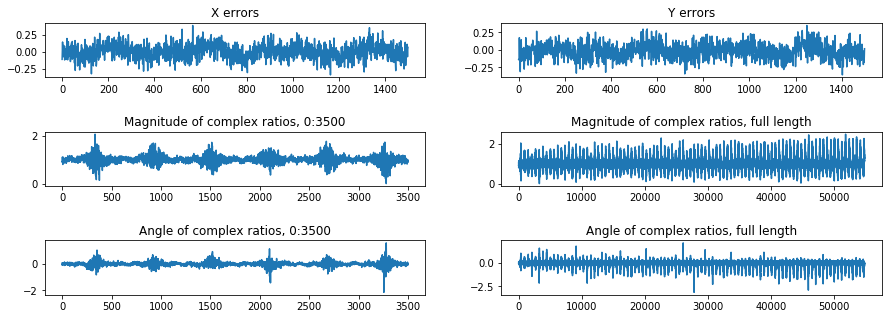

In [49]:
## Going to perform FFT on the *complex* coordinates encoding Venus's Cartesian trajectory in the XY-plane
venus_complex = df['venus_x'] + 1j*df['venus_y']


# Getting optimal venus values from XY FFT optimizer
(venus_opt_length, venus_opt_freq_1, venus_opt_freq_2, venus_errors) = XY_fft_optimizer(body_name="venus", 
                                                                                                celestial_complex=venus_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
venus_yft_opt = np.fft.fft(venus_complex[0:venus_opt_length])

venus_approx_full = 1/len(venus_yft_opt) * np.exp(1j*np.angle(venus_yft_opt)[venus_opt_freq_1]) * (np.abs(venus_yft_opt)[venus_opt_freq_1] * 
                                                                 np.exp(2*math.pi*venus_opt_freq_1/len(venus_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
venus_approx_full += 1/len(venus_yft_opt) * np.exp(1j*np.angle(venus_yft_opt)[venus_opt_freq_2]) * (np.abs(venus_yft_opt)[venus_opt_freq_2] * 
                                                                 np.exp(2*math.pi*venus_opt_freq_2/len(venus_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
venus_complex_ratios = venus_complex / venus_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 1500), np.real(venus_approx_full[0:1500] - df['venus_x'][0:1500]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 1500), np.imag(venus_approx_full[0:1500]) - df['venus_y'][0:1500])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 3500), np.abs(venus_complex_ratios)[0:3500])
ax3.set_title("Magnitude of complex ratios, 0:3500")
ax4.plot(np.arange(0, len(df)), np.abs(venus_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 3500), np.angle(venus_complex_ratios)[0:3500])
ax5.set_title("Angle of complex ratios, 0:3500")
ax6.plot(np.arange(0, len(df)), np.angle(venus_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for the Moon (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

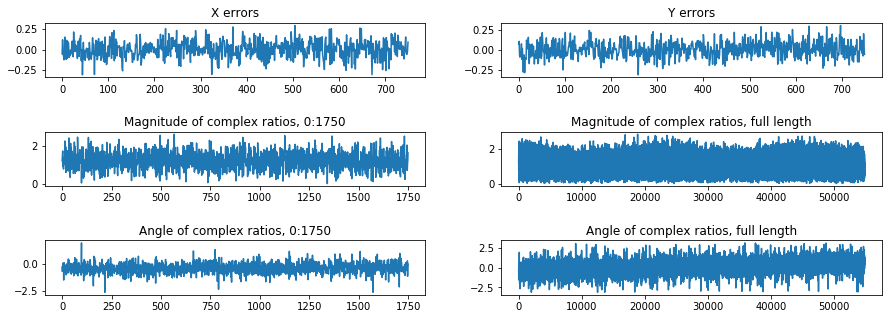

In [122]:
## **NOTE**: In the original noisy dataset, the noise dwarfs the Moon's measurements, making it impossible
## to recover the signal. For the sake of exercise, we simulate a weaker noise model to allow some signal recovery.
moon_complex = clean_df['moon_x'] + np.random.normal(0, 0.001, len(df)) + 1j*clean_df['moon_y'] + 1j*np.random.normal(0, 0.001, len(df))


# Getting optimal moon values from XY FFT optimizer
(moon_opt_length, moon_opt_freq_1, moon_opt_freq_2, moon_errors) = XY_fft_optimizer(body_name="moon", 
                                                                                                celestial_complex=moon_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
moon_yft_opt = np.fft.fft(moon_complex[0:moon_opt_length])

moon_approx_full = 1/len(moon_yft_opt) * np.exp(1j*np.angle(moon_yft_opt)[moon_opt_freq_1]) * (np.abs(moon_yft_opt)[moon_opt_freq_1] * 
                                                                 np.exp(2*math.pi*moon_opt_freq_1/len(moon_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
moon_approx_full += 1/len(moon_yft_opt) * np.exp(1j*np.angle(moon_yft_opt)[moon_opt_freq_2]) * (np.abs(moon_yft_opt)[moon_opt_freq_2] * 
                                                                 np.exp(2*math.pi*moon_opt_freq_2/len(moon_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
moon_complex_ratios = moon_complex / moon_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 750), np.real(moon_approx_full[0:750] - df['moon_x'][0:750]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 750), np.imag(moon_approx_full[0:750]) - df['moon_y'][0:750])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 1750), np.abs(moon_complex_ratios)[0:1750])
ax3.set_title("Magnitude of complex ratios, 0:1750")
ax4.plot(np.arange(0, len(df)), np.abs(moon_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 1750), np.angle(moon_complex_ratios)[0:1750])
ax5.set_title("Angle of complex ratios, 0:1750")
ax6.plot(np.arange(0, len(df)), np.angle(moon_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for Mars (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

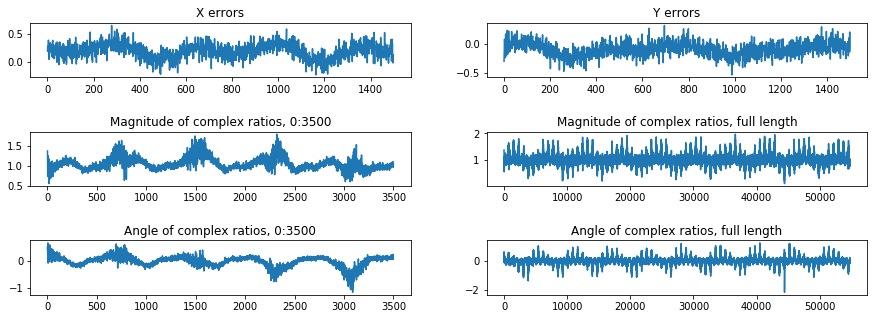

In [53]:
## Going to perform FFT on the *complex* coordinates encoding Mars's Cartesian trajectory in the XY-plane
mars_complex = df['mars_x'] + 1j*df['mars_y']


# Getting optimal mars values from XY FFT optimizer
(mars_opt_length, mars_opt_freq_1, mars_opt_freq_2, mars_errors) = XY_fft_optimizer(body_name="mars", 
                                                                                                celestial_complex=mars_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
mars_yft_opt = np.fft.fft(mars_complex[0:mars_opt_length])

mars_approx_full = 1/len(mars_yft_opt) * np.exp(1j*np.angle(mars_yft_opt)[mars_opt_freq_1]) * (np.abs(mars_yft_opt)[mars_opt_freq_1] * 
                                                                 np.exp(2*math.pi*mars_opt_freq_1/len(mars_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
mars_approx_full += 1/len(mars_yft_opt) * np.exp(1j*np.angle(mars_yft_opt)[mars_opt_freq_2]) * (np.abs(mars_yft_opt)[mars_opt_freq_2] * 
                                                                 np.exp(2*math.pi*mars_opt_freq_2/len(mars_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
mars_complex_ratios = mars_complex / mars_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 1500), np.real(mars_approx_full[0:1500] - df['mars_x'][0:1500]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 1500), np.imag(mars_approx_full[0:1500]) - df['mars_y'][0:1500])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 3500), np.abs(mars_complex_ratios)[0:3500])
ax3.set_title("Magnitude of complex ratios, 0:3500")
ax4.plot(np.arange(0, len(df)), np.abs(mars_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 3500), np.angle(mars_complex_ratios)[0:3500])
ax5.set_title("Angle of complex ratios, 0:3500")
ax6.plot(np.arange(0, len(df)), np.angle(mars_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for Jupiter (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

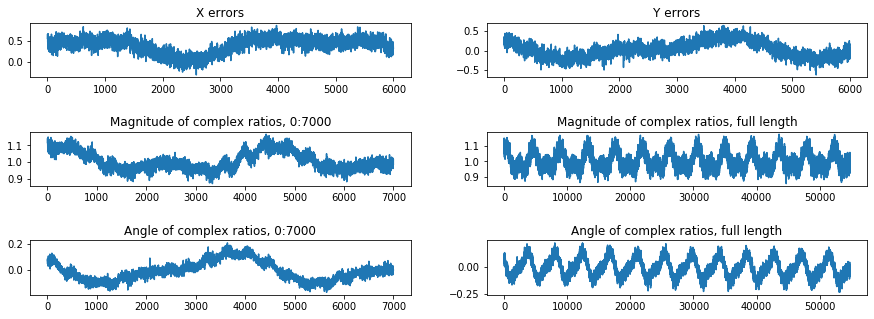

In [54]:
## Going to perform FFT on the *complex* coordinates encoding Jupiter's Cartesian trajectory in the XY-plane
jupiter_complex = df['jupiter_x'] + 1j*df['jupiter_y']


# Getting optimal jupiter values from XY FFT optimizer
(jupiter_opt_length, jupiter_opt_freq_1, jupiter_opt_freq_2, jupiter_errors) = XY_fft_optimizer(body_name="jupiter", 
                                                                                                celestial_complex=jupiter_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
jupiter_yft_opt = np.fft.fft(jupiter_complex[0:jupiter_opt_length])

jupiter_approx_full = 1/len(jupiter_yft_opt) * np.exp(1j*np.angle(jupiter_yft_opt)[jupiter_opt_freq_1]) * (np.abs(jupiter_yft_opt)[jupiter_opt_freq_1] * 
                                                                 np.exp(2*math.pi*jupiter_opt_freq_1/len(jupiter_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
jupiter_approx_full += 1/len(jupiter_yft_opt) * np.exp(1j*np.angle(jupiter_yft_opt)[jupiter_opt_freq_2]) * (np.abs(jupiter_yft_opt)[jupiter_opt_freq_2] * 
                                                                 np.exp(2*math.pi*jupiter_opt_freq_2/len(jupiter_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
jupiter_complex_ratios = jupiter_complex / jupiter_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 6000), np.real(jupiter_approx_full[0:6000] - df['jupiter_x'][0:6000]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 6000), np.imag(jupiter_approx_full[0:6000]) - df['jupiter_y'][0:6000])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 7000), np.abs(jupiter_complex_ratios)[0:7000])
ax3.set_title("Magnitude of complex ratios, 0:7000")
ax4.plot(np.arange(0, len(df)), np.abs(jupiter_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 7000), np.angle(jupiter_complex_ratios)[0:7000])
ax5.set_title("Angle of complex ratios, 0:7000")
ax6.plot(np.arange(0, len(df)), np.angle(jupiter_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for Saturn (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

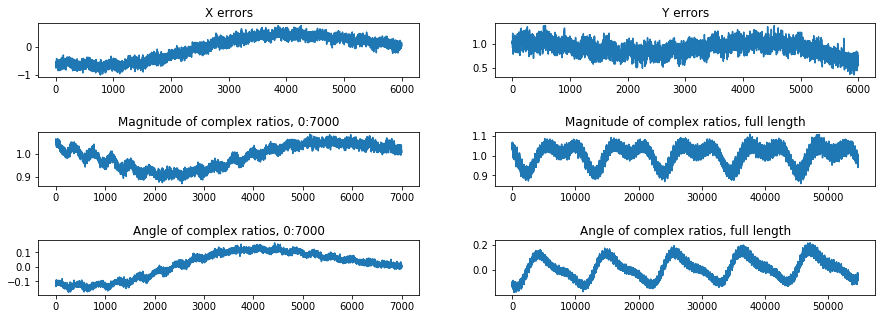

In [55]:
## Going to perform FFT on the *complex* coordinates encoding Saturn's Cartesian trajectory in the XY-plane
saturn_complex = df['saturn_x'] + 1j*df['saturn_y']


# Getting optimal saturn values from XY FFT optimizer
(saturn_opt_length, saturn_opt_freq_1, saturn_opt_freq_2, saturn_errors) = XY_fft_optimizer(body_name="saturn", 
                                                                                                celestial_complex=saturn_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
saturn_yft_opt = np.fft.fft(saturn_complex[0:saturn_opt_length])

saturn_approx_full = 1/len(saturn_yft_opt) * np.exp(1j*np.angle(saturn_yft_opt)[saturn_opt_freq_1]) * (np.abs(saturn_yft_opt)[saturn_opt_freq_1] * 
                                                                 np.exp(2*math.pi*saturn_opt_freq_1/len(saturn_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
saturn_approx_full += 1/len(saturn_yft_opt) * np.exp(1j*np.angle(saturn_yft_opt)[saturn_opt_freq_2]) * (np.abs(saturn_yft_opt)[saturn_opt_freq_2] * 
                                                                 np.exp(2*math.pi*saturn_opt_freq_2/len(saturn_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
saturn_complex_ratios = saturn_complex / saturn_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 6000), np.real(saturn_approx_full[0:6000] - df['saturn_x'][0:6000]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 6000), np.imag(saturn_approx_full[0:6000]) - df['saturn_y'][0:6000])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 7000), np.abs(saturn_complex_ratios)[0:7000])
ax3.set_title("Magnitude of complex ratios, 0:7000")
ax4.plot(np.arange(0, len(df)), np.abs(saturn_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 7000), np.angle(saturn_complex_ratios)[0:7000])
ax5.set_title("Angle of complex ratios, 0:7000")
ax6.plot(np.arange(0, len(df)), np.angle(saturn_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Looping through FFT window sizes to find top two frequencies for the Sun (XY approximation), then plotting errors compared to noisy training data

C:\Users\s1sri\Miniconda3\lib\site-packages\numpy\lib\type_check.py:158: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real


Text(0.5, 1.0, 'Angle of complex ratios, full length')

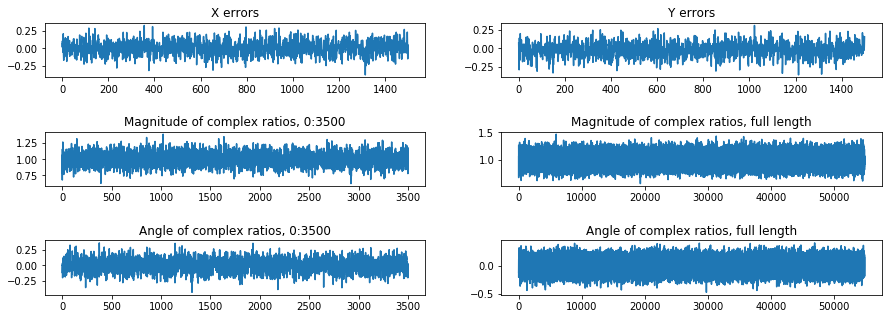

In [56]:
## Going to perform FFT on the *complex* coordinates encoding the Sun's Cartesian trajectory in the XY-plane
sun_complex = df['sun_x'] + 1j*df['sun_y']


# Getting optimal sun values from XY FFT optimizer
(sun_opt_length, sun_opt_freq_1, sun_opt_freq_2, sun_errors) = XY_fft_optimizer(body_name="sun", 
                                                                                                celestial_complex=sun_complex, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal from approximation, then comparing to noisy training data. First row is X and Y errors respectively,
# second row is magnitude of complex ratios at two different timescales, and third row is angle of complex ratios (phase
# difference) at two different timescales.
sun_yft_opt = np.fft.fft(sun_complex[0:sun_opt_length])

sun_approx_full = 1/len(sun_yft_opt) * np.exp(1j*np.angle(sun_yft_opt)[sun_opt_freq_1]) * (np.abs(sun_yft_opt)[sun_opt_freq_1] * 
                                                                 np.exp(2*math.pi*sun_opt_freq_1/len(sun_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
sun_approx_full += 1/len(sun_yft_opt) * np.exp(1j*np.angle(sun_yft_opt)[sun_opt_freq_2]) * (np.abs(sun_yft_opt)[sun_opt_freq_2] * 
                                                                 np.exp(2*math.pi*sun_opt_freq_2/len(sun_yft_opt)*1j*
                                                                       np.arange(0, len(df))))
sun_complex_ratios = sun_complex / sun_approx_full
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
ax1.plot(np.arange(0, 1500), np.real(sun_approx_full[0:1500] - df['sun_x'][0:1500]))
ax1.set_title("X errors")
ax2.plot(np.arange(0, 1500), np.imag(sun_approx_full[0:1500]) - df['sun_y'][0:1500])
ax2.set_title("Y errors")
ax3.plot(np.arange(0, 3500), np.abs(sun_complex_ratios)[0:3500])
ax3.set_title("Magnitude of complex ratios, 0:3500")
ax4.plot(np.arange(0, len(df)), np.abs(sun_complex_ratios))
ax4.set_title("Magnitude of complex ratios, full length")
ax5.plot(np.arange(0, 3500), np.angle(sun_complex_ratios)[0:3500])
ax5.set_title("Angle of complex ratios, 0:3500")
ax6.plot(np.arange(0, len(df)), np.angle(sun_complex_ratios))
ax6.set_title("Angle of complex ratios, full length")

### Function to loop through FFT window sizes to find top two frequencies for celestial body Z-approximation

In [57]:
def Z_fft_optimizer(body_name, celestial_real, start, end, step, val_size):
    # Input "celestial_polar" needs to be a vector of *real* values (corresponding to celestial body's Z coordinates) of
    # length >= end + val_size.
    # Input "body_name" needs to be a string corresponding to celestial body stored in dataframe.

    # Note that this function is for approximating movement in the Z axis. For the XY-plane (ecliptic), see "XY_fft_optimizer".
    # Looping through different choices of FFT window length, noting MSE for the 2-frequency approximations from each choice.
    # MSE is computed using reconstruction of signal evaluated on fixed time points (size "val_size") OUTSIDE of FFT window,
    # with the **NOISY dataset. Ground truth data is reserved for test time**.
    # Then returning optimal FFT window length from validation procedure, as well as its indices corresponding to 
    # top 2 frequencies, and finally a tuple of errors storing values generated throughout optimization.

    celestial_errors = []
    for K in range(start, end, step):
        celestial_zft = np.fft.fft(celestial_real[0:K])

        # MAKING ADJUSTMENT HERE--earlier, we took FFT of a *complex* signal. Now, it is *real*. Have to discard aliased
        # frequencies from negative half of spectrum, AKA discard half of FFT indices (keep 0:length/2), when looking for 
        # distinct peaks.
        frequencies = peak_finder(np.abs(celestial_zft)[0:math.floor(len(celestial_zft)/2)])
        freq_1_ind = frequencies[0]
        if (len(frequencies) == 2):
            freq_2_ind = frequencies[1]

        # Manually doing inverse FFT, making sure to keep only real component
        celestial_approx = 1/len(celestial_zft) * 2 * np.real(np.exp(1j*np.angle(celestial_zft)[freq_1_ind]) * np.abs(celestial_zft)[freq_1_ind] * 
                                                                         np.exp(2*math.pi*freq_1_ind/len(celestial_zft)*1j*
                                                                               np.arange(K, K+val_size)))

        if (len(frequencies) == 2):
            celestial_approx += 1/len(celestial_zft) * 2 * np.real(np.exp(1j*np.angle(celestial_zft)[freq_2_ind]) * 
                                                               np.abs(celestial_zft)[freq_2_ind] * 
                                                               np.exp(2*math.pi*freq_2_ind/len(celestial_zft)*1j*np.arange(K, K+val_size)))

        # Evaluating MSE by reconstructing signal from FFT, evaluating it on time window of size "val_size" OUTSIDE
        # of FFT window
        MSE = 1/val_size * np.sum((celestial_approx - df[body_name+'_z'][K:K+val_size])**2)
        celestial_errors.append((K, freq_1_ind, freq_2_ind, MSE))

    # Finding window length (and two frequencies for that length) corresponding to minimum MSE
    opt_index = np.argmin(np.array([j[3] for j in celestial_errors]))
    celestial_opt_length = start + step * opt_index
    # Below are indices (between 1 to K, where K is FFT window length) corresponding to particular frequencies
    celestial_opt_freq_1 = celestial_errors[opt_index][1]
    celestial_opt_freq_2 = celestial_errors[opt_index][2]
    
    return (celestial_opt_length, celestial_opt_freq_1, celestial_opt_freq_2, celestial_errors)


### Now, looping through FFT window sizes to find top two frequencies for Mercury (Z AXIS), then plotting side-by-side with noisy data

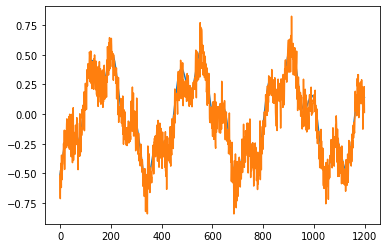

In [58]:
## Going to perform FFT on the *real* coordinates encoding Mercury's Cartesian trajectory in the z-axis
mercury_z = df['mercury_z']

(mercury_opt_z_length, mercury_opt_z_freq_1, mercury_opt_z_freq_2, mercury_errors_z) = Z_fft_optimizer(body_name="mercury", 
                                                                                                celestial_real=mercury_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
mercury_zft = np.fft.fft(mercury_z[0:mercury_opt_z_length])
mercury_approx = 1/len(mercury_zft) * 2 * np.real(np.exp(1j*np.angle(mercury_zft)[mercury_opt_z_freq_1]) * np.abs(mercury_zft)[mercury_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*mercury_opt_z_freq_1/len(mercury_zft)*1j*
                                                                           np.arange(0, len(df))))
mercury_approx += 1/len(mercury_zft) * 2 * np.real(np.exp(1j*np.angle(mercury_zft)[mercury_opt_z_freq_2]) * 
                                                           np.abs(mercury_zft)[mercury_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*mercury_opt_z_freq_2/len(mercury_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 1200), mercury_approx[mercury_opt_z_length:mercury_opt_z_length+1200])
plt.plot(np.arange(0, 1200), df['mercury_z'][mercury_opt_z_length:mercury_opt_z_length+1200])

### Now, looping through FFT window sizes to find top two frequencies for Venus (Z AXIS), , then plotting side-by-side with noisy data

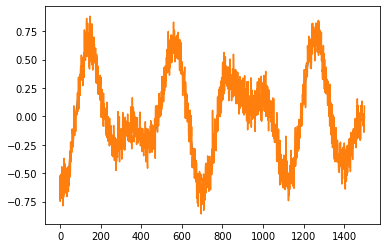

In [61]:
## Going to perform FFT on the *real* coordinates encoding Venus's Cartesian trajectory in the z-axis
venus_z = df['venus_z']

(venus_opt_z_length, venus_opt_z_freq_1, venus_opt_z_freq_2, venus_errors_z) = Z_fft_optimizer(body_name="venus", 
                                                                                                celestial_real=venus_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
venus_zft = np.fft.fft(venus_z[0:venus_opt_z_length])
venus_approx = 1/len(venus_zft) * 2 * np.real(np.exp(1j*np.angle(venus_zft)[venus_opt_z_freq_1]) * np.abs(venus_zft)[venus_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*venus_opt_z_freq_1/len(venus_zft)*1j*
                                                                           np.arange(0, len(df))))
venus_approx += 1/len(venus_zft) * 2 * np.real(np.exp(1j*np.angle(venus_zft)[venus_opt_z_freq_2]) * 
                                                           np.abs(venus_zft)[venus_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*venus_opt_z_freq_2/len(venus_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 1500), venus_approx[venus_opt_z_length:venus_opt_z_length+1500])
plt.plot(np.arange(0, 1500), df['venus_z'][venus_opt_z_length:venus_opt_z_length+1500])

### Now, looping through FFT window sizes to find top two frequencies for the Moon (Z AXIS), then plotting side-by-side with noisy data

#### NOTE: For the Moon's z-axis approximation, the FFT peak finder function from above broke down in bad ways. A fix is possible, but here we will just use a single frequency approximation for the Moon since that solves the problem, and since the eye test suggests that there is only one dominant frequency anyways

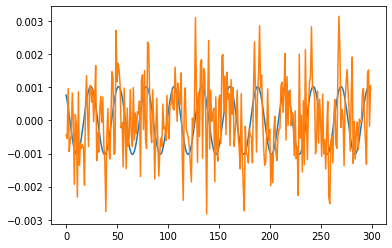

In [121]:
## **NOTE**: In the original noisy dataset, the noise dwarfs the Moon's z-axis measurements, making it impossible
## to recover the signal. For the sake of exercise, we simulate a weaker noise model to allow some signal recovery.

# Recreating the Moon's z-axis measurements using weaker noise model
moon_z = clean_df['moon_z'] + np.random.normal(0, 0.001, len(df))


# **NOT USING "Z_fft_optimizer" FUNCTION DUE TO MOON-SPECIFIC ISSUES, SEE NOTE IN CELL ABOVE!**
start=20
end=10000
step=1
val_size=10000
moon_real = moon_z

moon_errors = []
for K in range(start, end, step):
    moon_zft = np.fft.fft(moon_real[0:K])

    # MAKING ADJUSTMENT HERE--earlier, we took FFT of a *complex* signal. Now, it is *real*. Have to discard aliased
    # frequencies from negative half of spectrum, AKA discard half of FFT indices (keep 0:length/2), when looking for 
    # distinct peaks.
    frequencies = peak_finder(np.abs(moon_zft)[0:math.floor(len(moon_zft)/2)])
    freq_1_ind = frequencies[0]
    if (len(frequencies) == 2):
        freq_2_ind = frequencies[1]

    # Manually doing inverse FFT, making sure to keep only real component
    moon_approx = 1/len(moon_zft) * 2 * np.real(np.exp(1j*np.angle(moon_zft)[freq_1_ind]) * np.abs(moon_zft)[freq_1_ind] * 
                                                                     np.exp(2*math.pi*freq_1_ind/len(moon_zft)*1j*
                                                                           np.arange(K, K+val_size)))

    # **Dropping the second frequency (see note in above cell)**
    #if (len(frequencies) == 2):
        #moon_approx += 1/len(moon_zft) * 2 * np.real(np.exp(1j*np.angle(moon_zft)[freq_2_ind]) * 
                                                           #np.abs(moon_zft)[freq_2_ind] * 
                                                           #np.exp(2*math.pi*freq_2_ind/len(moon_zft)*1j*np.arange(K, K+val_size)))

                
    # Evaluating MSE by reconstructing signal from FFT, evaluating it on time window of size "val_size" OUTSIDE
    # of FFT window
    MSE = 1/val_size * np.sum((moon_approx - moon_z[K:K+val_size])**2)
    moon_errors.append((K, freq_1_ind, freq_2_ind, MSE))

# Finding window length (and two frequencies for that length) corresponding to minimum MSE
opt_index = np.argmin(np.array([j[3] for j in moon_errors]))
moon_opt_z_length = start + step * opt_index
# Below are indices (between 1 to K, where K is FFT window length) corresponding to particular frequencies
moon_opt_z_freq_1 = moon_errors[opt_index][1]
moon_opt_z_freq_2 = moon_errors[opt_index][2]




# Reconstructing signal to compare directly to noisy signal.
moon_zft = np.fft.fft(moon_z[0:moon_opt_z_length])
moon_approx = 1/len(moon_zft) * 2 * np.real(np.exp(1j*np.angle(moon_zft)[moon_opt_z_freq_1]) * np.abs(moon_zft)[moon_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*moon_opt_z_freq_1/len(moon_zft)*1j*
                                                                           np.arange(0, len(df))))

# **Dropping the second frequency (see note in above cell)**
#moon_approx += 1/len(moon_zft) * 2 * np.real(np.exp(1j*np.angle(moon_zft)[moon_opt_z_freq_2]) * 
                                                           #np.abs(moon_zft)[moon_opt_z_freq_2] * 
                                                           #np.exp(2*math.pi*moon_opt_z_freq_2/len(moon_zft)*1j*
                                                                  #np.arange(0, len(df))))

plt.plot(np.arange(0, 300), moon_approx[moon_opt_z_length:moon_opt_z_length+300])
plt.plot(np.arange(0, 300), moon_z[moon_opt_z_length:moon_opt_z_length+300])

### Now, looping through FFT window sizes to find top two frequencies for Mars (Z AXIS), then plotting side-by-side with noisy data

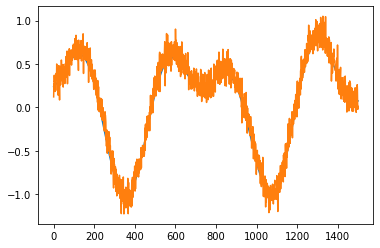

In [65]:
## Going to perform FFT on the *real* coordinates encoding mars's Cartesian trajectory in the z-axis
mars_z = df['mars_z']

(mars_opt_z_length, mars_opt_z_freq_1, mars_opt_z_freq_2, mars_errors_z) = Z_fft_optimizer(body_name="mars", 
                                                                                                celestial_real=mars_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
mars_zft = np.fft.fft(mars_z[0:mars_opt_z_length])
mars_approx = 1/len(mars_zft) * 2 * np.real(np.exp(1j*np.angle(mars_zft)[mars_opt_z_freq_1]) * np.abs(mars_zft)[mars_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*mars_opt_z_freq_1/len(mars_zft)*1j*
                                                                           np.arange(0, len(df))))
mars_approx += 1/len(mars_zft) * 2 * np.real(np.exp(1j*np.angle(mars_zft)[mars_opt_z_freq_2]) * 
                                                           np.abs(mars_zft)[mars_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*mars_opt_z_freq_2/len(mars_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 1500), mars_approx[mars_opt_z_length:mars_opt_z_length+1500])
plt.plot(np.arange(0, 1500), df['mars_z'][mars_opt_z_length:mars_opt_z_length+1500])

### Now, looping through FFT window sizes to find top two frequencies for Jupiter (Z AXIS), then plotting side-by-side with noisy data

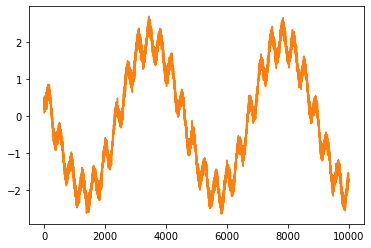

In [66]:
## Going to perform FFT on the *real* coordinates encoding jupiter's Cartesian trajectory in the z-axis
jupiter_z = df['jupiter_z']

(jupiter_opt_z_length, jupiter_opt_z_freq_1, jupiter_opt_z_freq_2, jupiter_errors_z) = Z_fft_optimizer(body_name="jupiter", 
                                                                                                celestial_real=jupiter_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
jupiter_zft = np.fft.fft(jupiter_z[0:jupiter_opt_z_length])
jupiter_approx = 1/len(jupiter_zft) * 2 * np.real(np.exp(1j*np.angle(jupiter_zft)[jupiter_opt_z_freq_1]) * np.abs(jupiter_zft)[jupiter_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*jupiter_opt_z_freq_1/len(jupiter_zft)*1j*
                                                                           np.arange(0, len(df))))
jupiter_approx += 1/len(jupiter_zft) * 2 * np.real(np.exp(1j*np.angle(jupiter_zft)[jupiter_opt_z_freq_2]) * 
                                                           np.abs(jupiter_zft)[jupiter_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*jupiter_opt_z_freq_2/len(jupiter_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 10000), jupiter_approx[jupiter_opt_z_length:jupiter_opt_z_length+10000])
plt.plot(np.arange(0, 10000), df['jupiter_z'][jupiter_opt_z_length:jupiter_opt_z_length+10000])

### Now, looping through FFT window sizes to find top two frequencies for Saturn (Z AXIS), then plotting side-by-side with noisy data

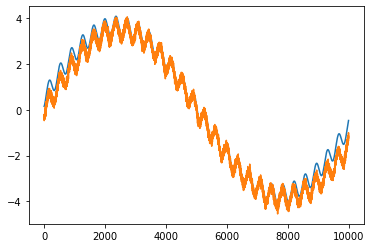

In [67]:
## Going to perform FFT on the *real* coordinates encoding saturn's Cartesian trajectory in the z-axis
saturn_z = df['saturn_z']

(saturn_opt_z_length, saturn_opt_z_freq_1, saturn_opt_z_freq_2, saturn_errors_z) = Z_fft_optimizer(body_name="saturn", 
                                                                                                celestial_real=saturn_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
saturn_zft = np.fft.fft(saturn_z[0:saturn_opt_z_length])
saturn_approx = 1/len(saturn_zft) * 2 * np.real(np.exp(1j*np.angle(saturn_zft)[saturn_opt_z_freq_1]) * np.abs(saturn_zft)[saturn_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*saturn_opt_z_freq_1/len(saturn_zft)*1j*
                                                                           np.arange(0, len(df))))
saturn_approx += 1/len(saturn_zft) * 2 * np.real(np.exp(1j*np.angle(saturn_zft)[saturn_opt_z_freq_2]) * 
                                                           np.abs(saturn_zft)[saturn_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*saturn_opt_z_freq_2/len(saturn_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 10000), saturn_approx[saturn_opt_z_length:saturn_opt_z_length+10000])
plt.plot(np.arange(0, 10000), df['saturn_z'][saturn_opt_z_length:saturn_opt_z_length+10000])

### Now, looping through FFT window sizes to find top two frequencies for the Sun (Z AXIS), then plotting side-by-side with noisy data

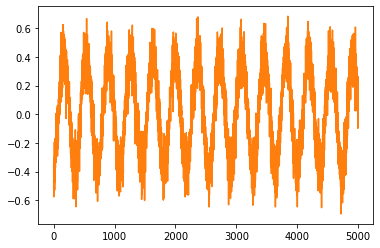

In [68]:
## Going to perform FFT on the *real* coordinates encoding sun's Cartesian trajectory in the z-axis
sun_z = df['sun_z']

(sun_opt_z_length, sun_opt_z_freq_1, sun_opt_z_freq_2, sun_errors_z) = Z_fft_optimizer(body_name="sun", 
                                                                                                celestial_real=sun_z, 
                                                                                                start=20, end=44787, step=5, 
                                                                                                val_size=10000)

# Reconstructing signal to compare directly to noisy signal.
sun_zft = np.fft.fft(sun_z[0:sun_opt_z_length])
sun_approx = 1/len(sun_zft) * 2 * np.real(np.exp(1j*np.angle(sun_zft)[sun_opt_z_freq_1]) * np.abs(sun_zft)[sun_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*sun_opt_z_freq_1/len(sun_zft)*1j*
                                                                           np.arange(0, len(df))))
sun_approx += 1/len(sun_zft) * 2 * np.real(np.exp(1j*np.angle(sun_zft)[sun_opt_z_freq_2]) * 
                                                           np.abs(sun_zft)[sun_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*sun_opt_z_freq_2/len(sun_zft)*1j*
                                                                  np.arange(0, len(df))))

plt.plot(np.arange(0, 5000), sun_approx[sun_opt_z_length:sun_opt_z_length+5000])
plt.plot(np.arange(0, 5000), df['sun_z'][sun_opt_z_length:sun_opt_z_length+5000])

# 3. Creating positional prediction functions for XYZ coordinates of celestial bodies, printing test error w.r.t. ground truth (clean data)

In [69]:
# Creating helper function for trigonometric calculations here. Prediction function is below!!!

# numpy.arctan2 is nice in that it takes into account the quadrant. However, it is discontinuous
# after the second quadrant (negative x-axis). This helper function aims to fix that by outputting 
# continuously over [0, 2*pi] throughout counter-clockwise rotation. (This might not be an issue in the first place TBH)
# Convention is the same: Angle is measured from positive x-axis.
def arctan_helper(y, x):
    continuous_arctan = np.arctan2(y, x)
    continuous_arctan[continuous_arctan < 0] = continuous_arctan[continuous_arctan < 0] + 2*math.pi
    
    return continuous_arctan
    

In [118]:
def celestial_predict(body_name, celestial_opt_length, celestial_opt_freq_1, celestial_opt_freq_2, 
                    celestial_opt_z_length, celestial_opt_z_freq_1, celestial_opt_z_freq_2, days, hours, minutes):
    # Input "body_name" is string for celestial body name.
    # Inputs "celestial_opt_(z)_length", "celestial_opt_(z)_freq_1", "celestial_opt_(z)_freq_2" are parameters that need
    # to be output from some FFT optimizer function. (See functions "XY_fft_optimizer" and "Z_fft_optimizer" above!)
    # Inputs "days", "hours", and "minutes" should be Numpy arrays, where each index corresponds to same timepoint.
    # Note that days, hours, minutes must be from starting point of 1/01/1850, 00:00:00!
    
    # Function returns both a Cartesian prediction in geocentric ecliptic system, as well as
    # geocentric ecliptic latitude, longitude, and distance. Can be used to locate object in the sky at
    # any location on Earth regardless of geodetic coordinates by finding the Vernal Equinox and the ecliptic in the sky.

    # Vector of time points where forecast will be made. Based off of data convention that 1 unit is 1 day
    time_points = days + hours/24 + minutes/(24*60)
    
    ## **NOTE**: In the original noisy dataset, the noise dwarfs the Moon's measurements, making it impossible
    ## to recover the signal. For the case of lunar prediction, we simulate a weaker noise model to allow some signal recovery.
    if (body_name == "moon"):
        celestial_complex = clean_df['moon_x'] + np.random.normal(0, 0.001, len(df)) + 1j*clean_df['moon_y'] + 1j*np.random.normal(0, 0.001, len(df))
    else:
        celestial_complex = df[body_name+"_x"] + 1j*df[body_name+"_y"]
        
    celestial_xyft_opt = np.fft.fft(celestial_complex[0:celestial_opt_length])
    celestial_approx_xy = 1/len(celestial_xyft_opt) * np.exp(1j*np.angle(celestial_xyft_opt)[celestial_opt_freq_1]) * (np.abs(celestial_xyft_opt)[celestial_opt_freq_1] * 
                                                                                                   np.exp(2*math.pi*celestial_opt_freq_1/len(celestial_xyft_opt)*1j*
                                                                                                          time_points))
    if (celestial_opt_freq_2 != "NA"):
        celestial_approx_xy += 1/len(celestial_xyft_opt) * np.exp(1j*np.angle(celestial_xyft_opt)[celestial_opt_freq_2]) * (np.abs(celestial_xyft_opt)[celestial_opt_freq_2] * 
                                                                                                        np.exp(2*math.pi*celestial_opt_freq_2/len(celestial_xyft_opt)*1j*
                                                                                                               time_points))
    if (body_name == "moon"):
        celestial_z = clean_df['moon_z'] + np.random.normal(0, 0.001, len(df))
    else:
        celestial_z = df[body_name+"_z"]
        
    celestial_zft_opt = np.fft.fft(celestial_z[0:celestial_opt_z_length])
    celestial_approx_z = 1/len(celestial_zft_opt) * 2 * np.real(np.exp(1j*np.angle(celestial_zft_opt)[celestial_opt_z_freq_1]) * np.abs(celestial_zft_opt)[celestial_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*celestial_opt_z_freq_1/len(celestial_zft_opt)*1j*
                                                                           time_points))
    if (celestial_opt_z_freq_2 != "NA"):
        celestial_approx_z += 1/len(celestial_zft_opt) * 2 * np.real(np.exp(1j*np.angle(celestial_zft_opt)[celestial_opt_z_freq_2]) * 
                                                               np.abs(celestial_zft_opt)[celestial_opt_z_freq_2] * 
                                                               np.exp(2*math.pi*celestial_opt_z_freq_2/len(celestial_zft_opt)*1j*
                                                                      time_points))
    
    # Computing cartesian coordinates using geocentric ecliptic system
    celestial_xhat = np.real(celestial_approx_xy)
    celestial_yhat = np.imag(celestial_approx_xy)
    celestial_zhat = celestial_approx_z
    
    # Computing geocentric ecliptic latitude, longitude, and distance which can be used to locate object in sky
    celestial_latitude = np.arctan2(celestial_zhat, np.sqrt(celestial_xhat**2 + celestial_yhat**2))
    celestial_longitude = np.arctan2(celestial_yhat, celestial_xhat)
    celestial_distance = np.sqrt(celestial_xhat**2 + celestial_yhat**2 + celestial_zhat**2)
    
    return (celestial_xhat, celestial_yhat, celestial_zhat, celestial_latitude, celestial_longitude, celestial_distance)

### Printing test errors using ground truth for optimal XYZ approximations

In [123]:
# Finding MSE and R-squared (variance explained) for optimal Mercury XYZ approximation using *ground truth* (clean data)
(mercury_xhat, mercury_yhat, mercury_zhat, mercury_lat, mercury_long, mercury_dist) = celestial_predict("mercury",
                                                                                                        mercury_opt_length,
                                                                                                        mercury_opt_freq_1,
                                                                                                        mercury_opt_freq_2,
                                                                                                        mercury_opt_z_length,
                                                                                                        mercury_opt_z_freq_1,
                                                                                                        mercury_opt_z_freq_2,
                                                                                                        days=np.arange(0,len(df)),
                                                                                                        hours=np.zeros(len(df)),
                                                                                                        minutes=np.zeros(len(df)))
mercury_test_error = 1/(len(df))*(np.linalg.norm(mercury_xhat - clean_df['mercury_x'])**2 + 
                                  np.linalg.norm(mercury_yhat - clean_df['mercury_y'])**2 + 
                                  np.linalg.norm(mercury_zhat - clean_df['mercury_z'])**2)
mercury_R_squared = 1 - (np.var(mercury_xhat - clean_df['mercury_x']) + np.var(mercury_yhat - clean_df['mercury_y']) + 
                         np.var(mercury_zhat - clean_df['mercury_z'])) / (np.var(clean_df['mercury_x']) + 
                                                                          np.var(clean_df['mercury_y']) + 
                                                                          np.var(clean_df['mercury_z']))


# Finding MSE and R-squared (variance explained) for optimal Venus XYZ approximation using *ground truth* (clean data)
(venus_xhat, venus_yhat, venus_zhat, venus_lat, venus_long, venus_dist) = celestial_predict("venus",
                                                                                            venus_opt_length,
                                                                                            venus_opt_freq_1,
                                                                                            venus_opt_freq_2,
                                                                                            venus_opt_z_length,
                                                                                            venus_opt_z_freq_1,
                                                                                            venus_opt_z_freq_2,
                                                                                            days=np.arange(0,len(df)),
                                                                                            hours=np.zeros(len(df)),
                                                                                            minutes=np.zeros(len(df)))
venus_test_error = 1/(len(df))*(np.linalg.norm(venus_xhat - clean_df['venus_x'])**2 + 
                                  np.linalg.norm(venus_yhat - clean_df['venus_y'])**2 + 
                                  np.linalg.norm(venus_zhat - clean_df['venus_z'])**2)
venus_R_squared = 1 - (np.var(venus_xhat - clean_df['venus_x']) + np.var(venus_yhat - clean_df['venus_y']) + 
                         np.var(venus_zhat - clean_df['venus_z'])) / (np.var(clean_df['venus_x']) + 
                                                                          np.var(clean_df['venus_y']) + 
                                                                          np.var(clean_df['venus_z']))


# Finding MSE and R-squared (variance explained) for optimal Moon XYZ approximation using *ground truth* (clean data)
(moon_xhat, moon_yhat, moon_zhat, moon_lat, moon_long, moon_dist) = celestial_predict("moon",
                                                                                        moon_opt_length,
                                                                                        moon_opt_freq_1,
                                                                                        moon_opt_freq_2,
                                                                                        moon_opt_z_length,
                                                                                        moon_opt_z_freq_1,
                                                                                        "NA",
                                                                                        days=np.arange(0,len(df)),
                                                                                        hours=np.zeros(len(df)),
                                                                                        minutes=np.zeros(len(df)))

moon_test_error = 1/(len(df))*(np.linalg.norm(moon_xhat - clean_df['moon_x'])**2 + 
                                  np.linalg.norm(moon_yhat - clean_df['moon_y'])**2 + 
                                  np.linalg.norm(moon_zhat - clean_df['moon_z'])**2)
moon_R_squared = 1 - (np.var(moon_xhat - clean_df['moon_x']) + np.var(moon_yhat - clean_df['moon_y']) + 
                         np.var(moon_zhat - clean_df['moon_z'])) / (np.var(clean_df['moon_x']) + 
                                                                          np.var(clean_df['moon_y']) + 
                                                                          np.var(clean_df['moon_z']))


# Finding MSE and R-squared (variance explained) for optimal Mars XYZ approximation using *ground truth* (clean data)
(mars_xhat, mars_yhat, mars_zhat, mars_lat, mars_long, mars_dist) = celestial_predict("mars",
                                                                                        mars_opt_length,
                                                                                        mars_opt_freq_1,
                                                                                        mars_opt_freq_2,
                                                                                        mars_opt_z_length,
                                                                                        mars_opt_z_freq_1,
                                                                                        mars_opt_z_freq_2,
                                                                                        days=np.arange(0,len(df)),
                                                                                        hours=np.zeros(len(df)),
                                                                                        minutes=np.zeros(len(df)))
mars_test_error = 1/(len(df))*(np.linalg.norm(mars_xhat - clean_df['mars_x'])**2 + 
                                  np.linalg.norm(mars_yhat - clean_df['mars_y'])**2 + 
                                  np.linalg.norm(mars_zhat - clean_df['mars_z'])**2)
mars_R_squared = 1 - (np.var(mars_xhat - clean_df['mars_x']) + np.var(mars_yhat - clean_df['mars_y']) + 
                         np.var(mars_zhat - clean_df['mars_z'])) / (np.var(clean_df['mars_x']) + 
                                                                          np.var(clean_df['mars_y']) + 
                                                                          np.var(clean_df['mars_z']))


# Finding MSE and R-squared (variance explained) for optimal Jupiter XYZ approximation using *ground truth* (clean data)
(jupiter_xhat, jupiter_yhat, jupiter_zhat, jupiter_lat, jupiter_long, jupiter_dist) = celestial_predict("jupiter",
                                                                                                        jupiter_opt_length,
                                                                                                        jupiter_opt_freq_1,
                                                                                                        jupiter_opt_freq_2,
                                                                                                        jupiter_opt_z_length,
                                                                                                        jupiter_opt_z_freq_1,
                                                                                                        jupiter_opt_z_freq_2,
                                                                                                        days=np.arange(0,len(df)),
                                                                                                        hours=np.zeros(len(df)),
                                                                                                        minutes=np.zeros(len(df)))
jupiter_test_error = 1/(len(df))*(np.linalg.norm(jupiter_xhat - clean_df['jupiter_x'])**2 + 
                                  np.linalg.norm(jupiter_yhat - clean_df['jupiter_y'])**2 + 
                                  np.linalg.norm(jupiter_zhat - clean_df['jupiter_z'])**2)
jupiter_R_squared = 1 - (np.var(jupiter_xhat - clean_df['jupiter_x']) + np.var(jupiter_yhat - clean_df['jupiter_y']) + 
                         np.var(jupiter_zhat - clean_df['jupiter_z'])) / (np.var(clean_df['jupiter_x']) + 
                                                                          np.var(clean_df['jupiter_y']) + 
                                                                          np.var(clean_df['jupiter_z']))


# Finding MSE and R-squared (variance explained) for optimal Saturn XYZ approximation using *ground truth* (clean data)
(saturn_xhat, saturn_yhat, saturn_zhat, saturn_lat, saturn_long, saturn_dist) = celestial_predict("saturn",
                                                                                                    saturn_opt_length,
                                                                                                    saturn_opt_freq_1,
                                                                                                    saturn_opt_freq_2,
                                                                                                    saturn_opt_z_length,
                                                                                                    saturn_opt_z_freq_1,
                                                                                                    saturn_opt_z_freq_2,
                                                                                                    days=np.arange(0,len(df)),
                                                                                                    hours=np.zeros(len(df)),
                                                                                                    minutes=np.zeros(len(df)))
saturn_test_error = 1/(len(df))*(np.linalg.norm(saturn_xhat - clean_df['saturn_x'])**2 + 
                                  np.linalg.norm(saturn_yhat - clean_df['saturn_y'])**2 + 
                                  np.linalg.norm(saturn_zhat - clean_df['saturn_z'])**2)
saturn_R_squared = 1 - (np.var(saturn_xhat - clean_df['saturn_x']) + np.var(saturn_yhat - clean_df['saturn_y']) + 
                         np.var(saturn_zhat - clean_df['saturn_z'])) / (np.var(clean_df['saturn_x']) + 
                                                                          np.var(clean_df['saturn_y']) + 
                                                                          np.var(clean_df['saturn_z']))


# Finding MSE and R-squared (variance explained) for optimal Sun XYZ approximation using *ground truth* (clean data)
(sun_xhat, sun_yhat, sun_zhat, sun_lat, sun_long, sun_dist) = celestial_predict("sun",
                                                                                sun_opt_length,
                                                                                sun_opt_freq_1,
                                                                                sun_opt_freq_2,
                                                                                sun_opt_z_length,
                                                                                sun_opt_z_freq_1,
                                                                                sun_opt_z_freq_2,
                                                                                days=np.arange(0,len(df)),
                                                                                hours=np.zeros(len(df)),
                                                                                minutes=np.zeros(len(df)))
sun_test_error = 1/(len(df))*(np.linalg.norm(sun_xhat - clean_df['sun_x'])**2 + 
                                  np.linalg.norm(sun_yhat - clean_df['sun_y'])**2 + 
                                  np.linalg.norm(sun_zhat - clean_df['sun_z'])**2)
sun_R_squared = 1 - (np.var(sun_xhat - clean_df['sun_x']) + np.var(sun_yhat - clean_df['sun_y']) + 
                         np.var(sun_zhat - clean_df['sun_z'])) / (np.var(clean_df['sun_x']) + 
                                                                          np.var(clean_df['sun_y']) + 
                                                                          np.var(clean_df['sun_z']))

# PRINTING TEST ERROR RESULTS #
print("***************************************************************")
print("Mercury MSE: {}, Mercury R2: {}".format(mercury_test_error, mercury_R_squared))
print("Venus MSE: {}, Venus R2: {}".format(venus_test_error, venus_R_squared))
print("Moon MSE: {}, Moon R2: {}".format(moon_test_error, moon_R_squared))
print("Mars MSE: {}, Mars R2: {}".format(mars_test_error, mars_R_squared))
print("Jupiter MSE: {}, Jupiter R2: {}".format(jupiter_test_error, jupiter_R_squared))
print("Saturn MSE: {}, Saturn R2: {}".format(saturn_test_error, saturn_R_squared))
print("Sun MSE: {}, Sun R2: {}".format(sun_test_error, sun_R_squared))
print("***************************************************************")




***************************************************************
Mercury MSE: 0.013699478191301339, Mercury R2: 0.9963219671388915
Venus MSE: 0.01902294384135898, Venus R2: 0.987741473637902
Moon MSE: 8.054716618607546e-07, Moon R2: 0.8787207934055392
Mars MSE: 0.06466694207833268, Mars R2: 0.996344969079939
Jupiter MSE: 0.3304093669485944, Jupiter R2: 0.9933699721080408
Saturn MSE: 1.2056527297951853, Saturn R2: 0.9932173765741562
Sun MSE: 0.0007642390862899227, Sun R2: 0.9998860280041841
***************************************************************


# 4. Using optimal X,Y,Z approximations of Sun and Moon to predict solar/lunar eclipses

### Predicting solar eclipse by identifying when the Moon aligns directly in between the Sun and Earth

In [124]:
full_domain = np.arange(0, len(df), 1/144) # Each time point is ten minutes, 1/144 since original time unit is 1 day


# Using optimal frequencies from moon XYZ approximations
moon_complex = clean_df['moon_x'] + np.random.normal(0, 0.001, len(df)) + 1j*clean_df['moon_y'] + 1j*np.random.normal(0, 0.001, len(df))
moon_z = clean_df['moon_z'] + np.random.normal(0, 0.001, len(df))
moon_xyft_opt = np.fft.fft(moon_complex[0:moon_opt_length])
moon_zft_opt = np.fft.fft(moon_z[0:moon_opt_z_length])

moon_xy_approx_full = 1/len(moon_xyft_opt) * np.exp(1j*np.angle(moon_xyft_opt)[moon_opt_freq_1]) * (np.abs(moon_xyft_opt)[moon_opt_freq_1] * 
                                                                 np.exp(2*math.pi*moon_opt_freq_1/len(moon_xyft_opt)*1j*
                                                                       full_domain))
moon_xy_approx_full += 1/len(moon_xyft_opt) * np.exp(1j*np.angle(moon_xyft_opt)[moon_opt_freq_2]) * (np.abs(moon_xyft_opt)[moon_opt_freq_2] * 
                                                                 np.exp(2*math.pi*moon_opt_freq_2/len(moon_xyft_opt)*1j*
                                                                       full_domain))

moon_xhat_full = np.real(moon_xy_approx_full)
moon_yhat_full = np.imag(moon_xy_approx_full)
# Dropping second frequency from Moon z-axis approximation (see corresponding Notebook cell)
moon_zhat_full = 1/len(moon_zft_opt) * 2 * np.real(np.exp(1j*np.angle(moon_zft_opt)[moon_opt_z_freq_1]) * np.abs(moon_zft_opt)[moon_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*moon_opt_z_freq_1/len(moon_zft_opt)*1j*
                                                                           full_domain))

# Moon ecliptic latitude, longitude, distance forecasts generated from Cartesian forecasts above
moon_latitude = np.arctan2(moon_zhat, np.sqrt(moon_xhat**2 + moon_yhat**2))
moon_longitude = np.arctan2(moon_yhat, moon_xhat)
moon_distance = np.sqrt(moon_xhat**2 + moon_yhat**2 + moon_zhat**2)


# Using optimal frequencies from Sun XYZ approximations
sun_complex = df['sun_x'] + 1j*df['sun_y']
sun_z = df['sun_z']
sun_xyft_opt = np.fft.fft(sun_complex[0:sun_opt_length])
sun_zft_opt = np.fft.fft(sun_z[0:sun_opt_z_length])

sun_xy_approx_full = 1/len(sun_xyft_opt) * np.exp(1j*np.angle(sun_xyft_opt)[sun_opt_freq_1]) * (np.abs(sun_xyft_opt)[sun_opt_freq_1] * 
                                                                 np.exp(2*math.pi*sun_opt_freq_1/len(sun_xyft_opt)*1j*
                                                                       full_domain))
sun_xy_approx_full += 1/len(sun_xyft_opt) * np.exp(1j*np.angle(sun_xyft_opt)[sun_opt_freq_2]) * (np.abs(sun_xyft_opt)[sun_opt_freq_2] * 
                                                                 np.exp(2*math.pi*sun_opt_freq_2/len(sun_xyft_opt)*1j*
                                                                       full_domain))

sun_xhat_full = np.real(sun_xy_approx_full)
sun_yhat_full = np.imag(sun_xy_approx_full)
sun_zhat_full = 1/len(sun_zft_opt) * 2 * np.real(np.exp(1j*np.angle(sun_zft_opt)[sun_opt_z_freq_1]) * np.abs(sun_zft_opt)[sun_opt_z_freq_1] * 
                                                                     np.exp(2*math.pi*sun_opt_z_freq_1/len(sun_zft_opt)*1j*
                                                                           full_domain))
sun_zhat_full += 1/len(sun_zft_opt) * 2 * np.real(np.exp(1j*np.angle(sun_zft_opt)[sun_opt_z_freq_2]) * 
                                                           np.abs(sun_zft_opt)[sun_opt_z_freq_2] * 
                                                           np.exp(2*math.pi*sun_opt_z_freq_2/len(sun_zft_opt)*1j*full_domain))


# sun ecliptic latitude, longitude, distance forecasts generated from Cartesian forecasts above
sun_latitude = np.arctan2(sun_zhat, np.sqrt(sun_xhat**2 + sun_yhat**2))
sun_longitude = np.arctan2(sun_yhat, sun_xhat)
sun_distance = np.sqrt(sun_xhat**2 + sun_yhat**2 + sun_zhat**2)


# Using logical rule to predict solar eclipse using moon/Sun ecliptic coordinates, and tolerances (user-defined) 
# for accuracy/precision
eps1 = 1e-2
eps2 = 1e-2
temp_long = np.array([np.abs(moon_longitude - sun_longitude), np.abs(np.abs(moon_longitude - sun_longitude) - 2*math.pi)])
temp_lat = np.array([np.abs(moon_latitude - sun_latitude), np.abs(np.abs(moon_latitude - sun_latitude) - 2*math.pi)])
solar_eclipse_predict = (np.min(temp_long, axis=0) < eps1) & (np.min(temp_lat, axis=0) < eps2)
solar_eclipse_predict = solar_eclipse_predict & (moon_distance < sun_distance) # This is almost certainly redundant
solar_eclipse_predict = np.argwhere(solar_eclipse_predict).reshape(1, -1)
solar_eclipse_predict = solar_eclipse_predict / 144 # Going from unit of 10 minutes to unit of days!

# Printing predicted solar eclipses between 1/1/1850 and 1/1/2000 by days from 1/1/1850 (so 0 = 1/1/1850) 
print(solar_eclipse_predict)

[[ 24.06944444  97.69444444 110.40972222 136.65972222 173.375
  173.99305556 176.04166667 191.01388889 198.19444444 203.72916667
  216.44444444 218.70138889 220.95833333 223.00694444 226.49305556
  231.00694444 238.38888889 241.05555556 249.25694444 264.22916667
  276.94444444 299.50694444 305.65972222 323.29861111 353.65277778]]


### Predicting lunar eclipse by identifying when the Earth aligns directly in between the Sun and Moon

In [125]:
# SEE SOLAR ECLIPSE CELL FOR THE CODE GENERATING THESE VARIABLES!

# Using logical rule to predict eclipse using moon/Sun XYZ coordinates, and tolerance of epsilon for accuracy
eps1 = 1e-2
eps2 = 1e-2
lunar_eclipse_predict = (np.abs(moon_latitude + sun_latitude) < eps1) & (np.abs(np.abs(moon_longitude - sun_longitude) 
                                                                                                    - math.pi) < eps2)

lunar_eclipse_predict = np.argwhere(lunar_eclipse_predict).reshape(1, -1)
lunar_eclipse_predict = lunar_eclipse_predict / 144 # Going from unit of 10 minutes to unit of days!

# Printing predicted lunar eclipses between 1/1/1850 and 1/1/2000 by days from 1/1/1850 (so 0 = 1/1/1850) 
print(lunar_eclipse_predict)

[[ 34.22222222  72.36805556 148.25       163.22222222 165.88888889
  178.8125     181.47916667 183.52777778 185.78472222 186.19444444
  188.86111111 198.5        203.01388889 211.21527778 213.0625
  215.72916667 226.1875     233.97916667 236.23611111 256.74305556
  259.         264.53472222 271.71527778 295.50694444 333.45138889
  354.98611111]]


# 5. Exploring non-constant angular velocities

### Defining a function to calculate mean angular velocity of Cartesian trajectory *from a reference point*

In [74]:
def reference_angular_velocities(trajectory_x, trajectory_y, reference):
    # Inputs "trajectory_x" and "trajectory_y" need to be the same length!
    # Input "reference" needs to be a 1x2 Numpy array, where first coordinate is x and second coordinate is y
    
    # Computes angular velocities by averaging over cosine angles between two subsequent points in time,
    # where the points are the vector difference of the original point and reference point
    
    angular_velocities = np.zeros(len(trajectory_x)-2)
    for k in range(len(trajectory_x)-2):
        vec_1 = np.array([trajectory_x[k], trajectory_y[k]])
        vec_1 = vec_1 - reference
        vec_2 = np.array([trajectory_x[k+1], trajectory_y[k+1]])
        vec_2 = vec_2 - reference
        #vec_3 = np.array([trajectory_x[k+2], trajectory_y[k+2]])
        #vec_3 = vec_3 - reference
        angle_1 = math.acos((vec_1 @ vec_2) / (np.linalg.norm(vec_1) * np.linalg.norm(vec_2)))
        #angle_2 = math.acos((vec_2 @ vec_3) / (np.linalg.norm(vec_2) * np.linalg.norm(vec_3)))
        #angular_velocities[k] = 0.5*(angle_1/1 + angle_2/1)
        angular_velocities[k] = angle_1 / 1
        
    
    return angular_velocities
    

### Determining angular velocities vs time for each celestial body from center of geocentric coordinate system (x=0, y=0).

In [94]:
# **NOTE: Working with clean dataset to try to understand dynamics rather than get bogged down in noise. To see if this
# technique improves prediction, reserve last ~15K entries of clean data for testing.


## MERCURY ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
mercury_clean = clean_df['mercury_x'][0:40000] + 1j*clean_df['mercury_y'][0:40000]
(mercury_opt_length, mercury_opt_freq_1, mercury_opt_freq_2, mercury_errors) = XY_fft_optimizer(body_name="mercury", 
                                                                                                celestial_complex=mercury_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

mercury_yft_opt = np.fft.fft(mercury_clean[0:mercury_opt_length])

mercury_2 = 1/len(mercury_yft_opt) * np.exp(1j*np.angle(mercury_yft_opt)[mercury_opt_freq_2]) * (np.abs(mercury_yft_opt)[mercury_opt_freq_2] * 
                                                                 np.exp(2*math.pi*mercury_opt_freq_2/len(mercury_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

mercury_2_x = np.real(mercury_2)
mercury_2_y = np.imag(mercury_2)

mercury_filtered_x = clean_df['mercury_x'][0:40000] - mercury_2_x
mercury_filtered_y = clean_df['mercury_y'][0:40000] - mercury_2_y

mercury_angular_velocities = reference_angular_velocities(mercury_filtered_x, mercury_filtered_y, reference=np.array([0, 0]))
mercury_omega_fft = np.abs(np.fft.fft(mercury_angular_velocities))



## VENUS ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
venus_clean = clean_df['venus_x'][0:40000] + 1j*clean_df['venus_y'][0:40000]
(venus_opt_length, venus_opt_freq_1, venus_opt_freq_2, venus_errors) = XY_fft_optimizer(body_name="venus", 
                                                                                                celestial_complex=venus_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

venus_yft_opt = np.fft.fft(venus_clean[0:venus_opt_length])

venus_2 = 1/len(venus_yft_opt) * np.exp(1j*np.angle(venus_yft_opt)[venus_opt_freq_2]) * (np.abs(venus_yft_opt)[venus_opt_freq_2] * 
                                                                 np.exp(2*math.pi*venus_opt_freq_2/len(venus_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

venus_2_x = np.real(venus_2)
venus_2_y = np.imag(venus_2)

venus_filtered_x = clean_df['venus_x'][0:40000] - venus_2_x
venus_filtered_y = clean_df['venus_y'][0:40000] - venus_2_y

venus_angular_velocities = reference_angular_velocities(venus_filtered_x, venus_filtered_y, reference=np.array([0, 0]))
venus_omega_fft = np.abs(np.fft.fft(venus_angular_velocities))



## MOON ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
moon_clean = clean_df['moon_x'][0:40000] + 1j*clean_df['moon_y'][0:40000]
(moon_opt_length, moon_opt_freq_1, moon_opt_freq_2, moon_errors) = XY_fft_optimizer(body_name="moon", 
                                                                                                celestial_complex=moon_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

moon_yft_opt = np.fft.fft(moon_clean[0:moon_opt_length])

moon_2 = 1/len(moon_yft_opt) * np.exp(1j*np.angle(moon_yft_opt)[moon_opt_freq_2]) * (np.abs(moon_yft_opt)[moon_opt_freq_2] * 
                                                                 np.exp(2*math.pi*moon_opt_freq_2/len(moon_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

moon_2_x = np.real(moon_2)
moon_2_y = np.imag(moon_2)

moon_filtered_x = clean_df['moon_x'][0:40000] - moon_2_x
moon_filtered_y = clean_df['moon_y'][0:40000] - moon_2_y

moon_angular_velocities = reference_angular_velocities(moon_filtered_x, moon_filtered_y, reference=np.array([0, 0]))
moon_omega_fft = np.abs(np.fft.fft(moon_angular_velocities))



## MARS ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
mars_clean = clean_df['mars_x'][0:40000] + 1j*clean_df['mars_y'][0:40000]
(mars_opt_length, mars_opt_freq_1, mars_opt_freq_2, mars_errors) = XY_fft_optimizer(body_name="mars", 
                                                                                                celestial_complex=mars_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

mars_yft_opt = np.fft.fft(mars_clean[0:mars_opt_length])

mars_2 = 1/len(mars_yft_opt) * np.exp(1j*np.angle(mars_yft_opt)[mars_opt_freq_2]) * (np.abs(mars_yft_opt)[mars_opt_freq_2] * 
                                                                 np.exp(2*math.pi*mars_opt_freq_2/len(mars_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

mars_2_x = np.real(mars_2)
mars_2_y = np.imag(mars_2)

mars_filtered_x = clean_df['mars_x'][0:40000] - mars_2_x
mars_filtered_y = clean_df['mars_y'][0:40000] - mars_2_y

mars_angular_velocities = reference_angular_velocities(mars_filtered_x, mars_filtered_y, reference=np.array([0, 0]))
mars_omega_fft = np.abs(np.fft.fft(mars_angular_velocities))


## JUPITER ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
jupiter_clean = clean_df['jupiter_x'][0:40000] + 1j*clean_df['jupiter_y'][0:40000]
(jupiter_opt_length, jupiter_opt_freq_1, jupiter_opt_freq_2, jupiter_errors) = XY_fft_optimizer(body_name="jupiter", 
                                                                                                celestial_complex=jupiter_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

jupiter_yft_opt = np.fft.fft(jupiter_clean[0:jupiter_opt_length])

jupiter_2 = 1/len(jupiter_yft_opt) * np.exp(1j*np.angle(jupiter_yft_opt)[jupiter_opt_freq_2]) * (np.abs(jupiter_yft_opt)[jupiter_opt_freq_2] * 
                                                                 np.exp(2*math.pi*jupiter_opt_freq_2/len(jupiter_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

jupiter_2_x = np.real(jupiter_2)
jupiter_2_y = np.imag(jupiter_2)

jupiter_filtered_x = clean_df['jupiter_x'][0:40000] - jupiter_2_x
jupiter_filtered_y = clean_df['jupiter_y'][0:40000] - jupiter_2_y

jupiter_angular_velocities = reference_angular_velocities(jupiter_filtered_x, jupiter_filtered_y, reference=np.array([0, 0]))
jupiter_omega_fft = np.abs(np.fft.fft(jupiter_angular_velocities))


## SATURN ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
saturn_clean = clean_df['saturn_x'][0:40000] + 1j*clean_df['saturn_y'][0:40000]
(saturn_opt_length, saturn_opt_freq_1, saturn_opt_freq_2, saturn_errors) = XY_fft_optimizer(body_name="saturn", 
                                                                                                celestial_complex=saturn_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

saturn_yft_opt = np.fft.fft(saturn_clean[0:saturn_opt_length])

saturn_2 = 1/len(saturn_yft_opt) * np.exp(1j*np.angle(saturn_yft_opt)[saturn_opt_freq_2]) * (np.abs(saturn_yft_opt)[saturn_opt_freq_2] * 
                                                                 np.exp(2*math.pi*saturn_opt_freq_2/len(saturn_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

saturn_2_x = np.real(saturn_2)
saturn_2_y = np.imag(saturn_2)

saturn_filtered_x = clean_df['saturn_x'][0:40000] - saturn_2_x
saturn_filtered_y = clean_df['saturn_y'][0:40000] - saturn_2_y

saturn_angular_velocities = reference_angular_velocities(saturn_filtered_x, saturn_filtered_y, reference=np.array([0, 0]))
saturn_omega_fft = np.abs(np.fft.fft(saturn_angular_velocities))


## SUN ANGULAR VELOCITIES ##
# Reserving last 10,000 clean points for prediction (testing this concept)
sun_clean = clean_df['sun_x'][0:40000] + 1j*clean_df['sun_y'][0:40000]
(sun_opt_length, sun_opt_freq_1, sun_opt_freq_2, sun_errors) = XY_fft_optimizer(body_name="sun", 
                                                                                                celestial_complex=sun_clean, 
                                                                                                start=20, end=30000, step=5, 
                                                                                                val_size=10000)

sun_yft_opt = np.fft.fft(sun_clean[0:sun_opt_length])

sun_2 = 1/len(sun_yft_opt) * np.exp(1j*np.angle(sun_yft_opt)[sun_opt_freq_2]) * (np.abs(sun_yft_opt)[sun_opt_freq_2] * 
                                                                 np.exp(2*math.pi*sun_opt_freq_2/len(sun_yft_opt)*1j*
                                                                       np.arange(0, 40000)))

sun_2_x = np.real(sun_2)
sun_2_y = np.imag(sun_2)

sun_filtered_x = clean_df['sun_x'][0:40000] - sun_2_x
sun_filtered_y = clean_df['sun_y'][0:40000] - sun_2_y

sun_angular_velocities = reference_angular_velocities(sun_filtered_x, sun_filtered_y, reference=np.array([0, 0]))
sun_omega_fft = np.abs(np.fft.fft(sun_angular_velocities))

### Plotting angular velocities vs time for each celestial body along with spectral plots of angular velocities

Text(0.5, 1.0, 'Sun angular velocity spectrum')

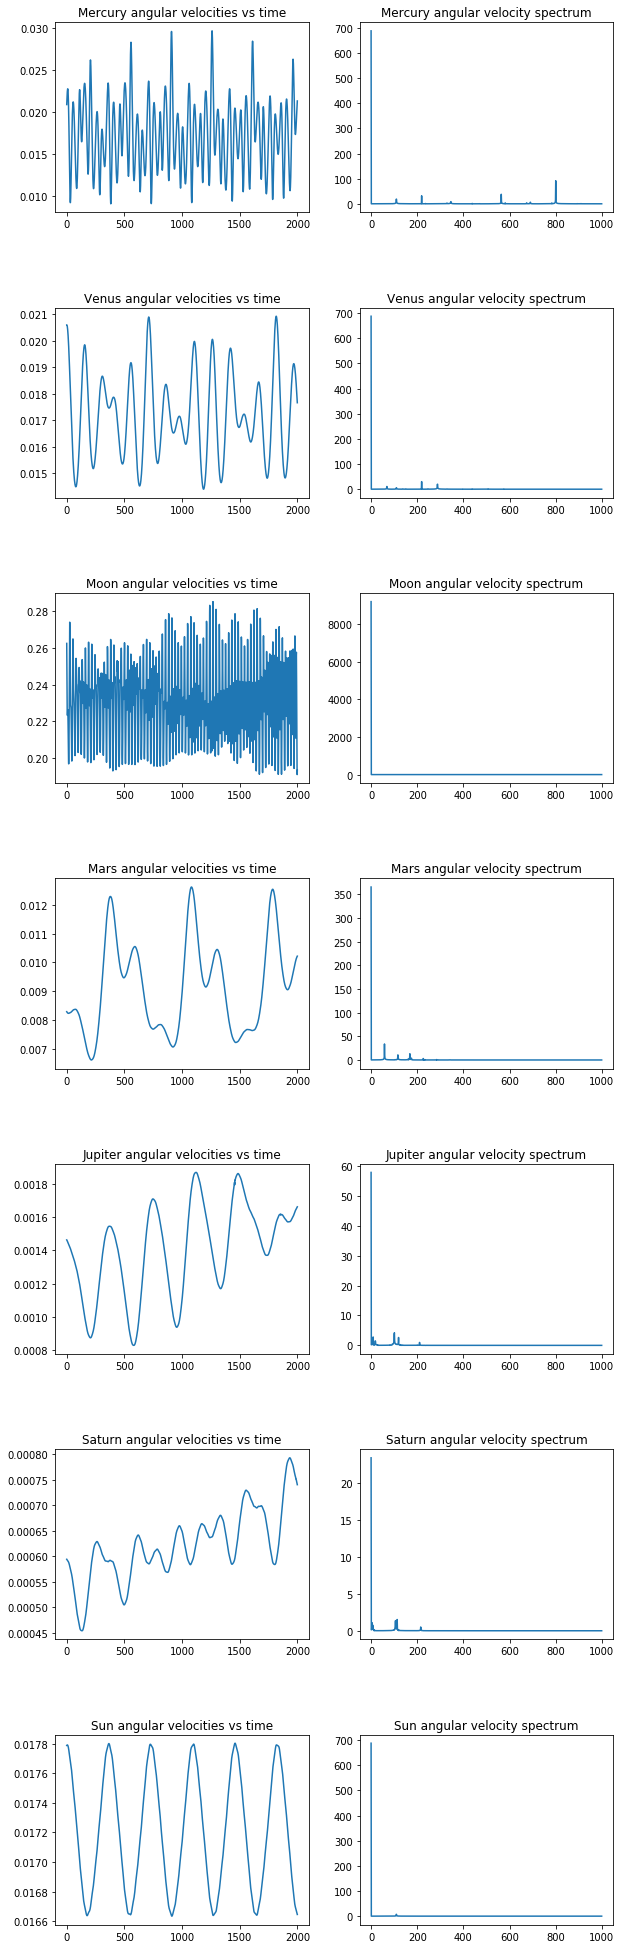

In [103]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(10, 35))
plt.subplots_adjust(hspace=0.5)
ax1.plot(np.arange(0, 2000), mercury_angular_velocities[0:2000])
ax1.set_title("Mercury angular velocities vs time")
ax2.plot(np.arange(0, 1000), mercury_omega_fft[0:1000])
ax2.set_title("Mercury angular velocity spectrum")
ax3.plot(np.arange(0, 2000), venus_angular_velocities[0:2000])
ax3.set_title("Venus angular velocities vs time")
ax4.plot(np.arange(0, 1000), venus_omega_fft[0:1000])
ax4.set_title("Venus angular velocity spectrum")
ax5.plot(np.arange(0, 2000), moon_angular_velocities[0:2000])
ax5.set_title("Moon angular velocities vs time")
ax6.plot(np.arange(0, 1000), moon_omega_fft[0:1000])
ax6.set_title("Moon angular velocity spectrum")
ax7.plot(np.arange(0, 2000), mars_angular_velocities[0:2000])
ax7.set_title("Mars angular velocities vs time")
ax8.plot(np.arange(0, 1000), mars_omega_fft[0:1000])
ax8.set_title("Mars angular velocity spectrum")
ax9.plot(np.arange(0, 2000), jupiter_angular_velocities[0:2000])
ax9.set_title("Jupiter angular velocities vs time")
ax10.plot(np.arange(0, 1000), jupiter_omega_fft[0:1000])
ax10.set_title("Jupiter angular velocity spectrum")
ax11.plot(np.arange(0, 2000), saturn_angular_velocities[0:2000])
ax11.set_title("Saturn angular velocities vs time")
ax12.plot(np.arange(0, 1000), saturn_omega_fft[0:1000])
ax12.set_title("Saturn angular velocity spectrum")
ax13.plot(np.arange(0, 2000), sun_angular_velocities[0:2000])
ax13.set_title("Sun angular velocities vs time")
ax14.plot(np.arange(0, 1000), sun_omega_fft[0:1000])
ax14.set_title("Sun angular velocity spectrum")